### Titanic Dataset - Data Exploration

In [299]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

df = pd.read_csv('train.csv')

In [300]:
X = df.drop('Survived', axis=1)
df['Cabin']=df['Cabin'].str[0]  # the first letter of the cabin reflects the deck on which it is located
X = df[['Age', 'Sex', 'Pclass', 'Embarked','Cabin','Fare','SibSp','Parch']] # the features used in the model
X.head()

,Age,Sex,Pclass,Embarked,Cabin,Fare,SibSp,Parch
0,22.0,male,3,S,NaN,7.2500,1,0
1,38.0,female,1,C,C,71.2833,1,0
2,26.0,female,3,S,NaN,7.9250,0,0
3,35.0,female,1,S,C,53.1000,1,0
4,35.0,male,3,S,NaN,8.0500,0,0


In [301]:
y = df['Survived']

In [302]:
type(X)

pandas.core.frame.DataFrame

In [303]:
X.shape #matrix, multi-dimensional (M, N)

(891, 8)

In [304]:
y.shape #vector, single array (M, )

(891,)

### Train-Test-Split

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#80% -> training, 20% -> testing

In [306]:
X_train.head()

,Age,Sex,Pclass,Embarked,Cabin,Fare,SibSp,Parch
331,45.5,male,1,S,C,28.5000,0,0
733,23.0,male,2,S,NaN,13.0000,0,0
382,32.0,male,3,S,NaN,7.9250,0,0
704,26.0,male,3,S,NaN,7.8542,1,0
813,6.0,female,3,S,NaN,31.2750,4,2


In [307]:
etdf = pd.concat([X_train, y_train], axis=1)         # the data analysis is based on the training data

### Exploratory Data Analysis (EDA)

In [308]:
etdf.head()

,Age,Sex,Pclass,Embarked,Cabin,Fare,SibSp,Parch,Survived
331,45.5,male,1,S,C,28.5000,0,0,0
733,23.0,male,2,S,NaN,13.0000,0,0,0
382,32.0,male,3,S,NaN,7.9250,0,0,0
704,26.0,male,3,S,NaN,7.8542,1,0,0
813,6.0,female,3,S,NaN,31.2750,4,2,0


In [309]:
etdf.describe()

,Age,Pclass,Fare,SibSp,Parch,Survived
count,572.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,29.498846,2.330056,32.586276,0.553371,0.379213,0.376404
std,14.500059,0.824584,51.969529,1.176404,0.791669,0.484824
min,0.420000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,7.925000,0.000000,0.000000,0.000000
50%,28.000000,3.000000,14.454200,0.000000,0.000000,0.000000
75%,38.000000,3.000000,30.500000,1.000000,0.000000,1.000000
max,80.000000,3.000000,512.329200,8.000000,6.000000,1.000000


Survived: 268
Perished: 444


Text(0, 0.5, 'Frequency')

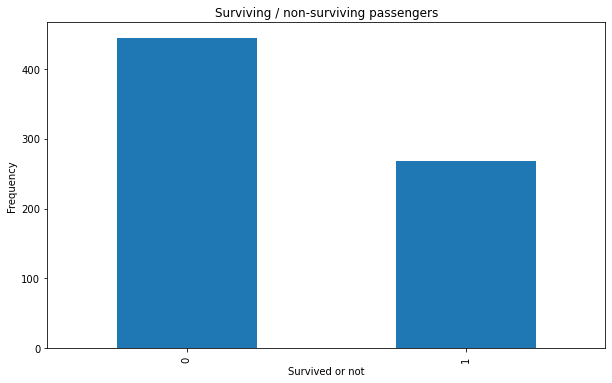

In [310]:
# Survived and perished passangers

print('Survived: ' + str(len(etdf[etdf['Survived']==1])))
print('Perished: ' + str(len(etdf[etdf['Survived']==0])))

ax = etdf['Survived'].value_counts().plot.bar(figsize=(10,6), title="Surviving / non-surviving passengers")
ax.set_xlabel("Survived or not")
ax.set_ylabel("Frequency")

In [311]:
#Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

survivingfirst = len(etdf[(etdf['Survived']==1) & (etdf['Pclass']==1)])
totalfirst=len(etdf[etdf['Pclass']==1])
print('The proportion of surviving 1st class passengers with regards to the total number of 1st class passengers: ')
print(survivingfirst * 100 / totalfirst)


The proportion of surviving 1st class passengers with regards to the total number of 1st class passengers: 
60.736196319018404


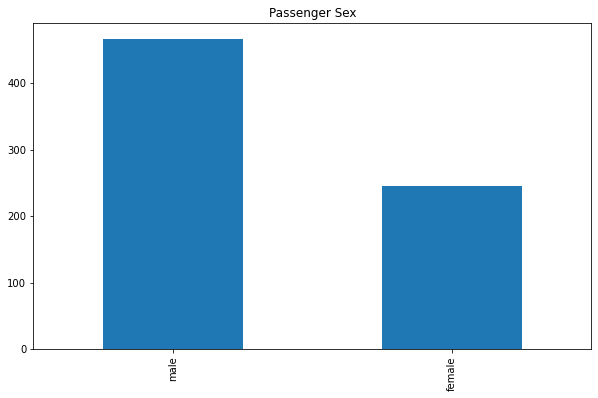

In [312]:
# Create a bar plot with separate bars for male/female passengers...

ax = etdf['Sex'].value_counts().plot.bar(figsize=(10,6), title="Passenger Sex")

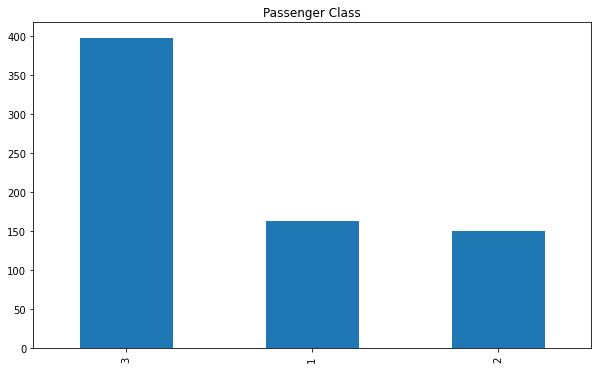

In [313]:
# ... and 1st/2nd/3rd class passengers

ax = etdf['Pclass'].value_counts().plot.bar(figsize=(10,6), title="Passenger Class")

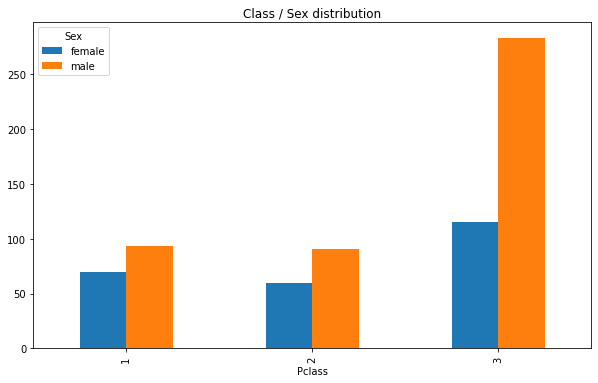

In [314]:
# On one bar plot:

speciessex=etdf.groupby(['Pclass', 'Sex'])['Sex'].count().unstack().plot.bar(figsize=(10,6), title="Class / Sex distribution")

Passengers without cabin, survived: 165
Passengers without cabin, casualties: 388


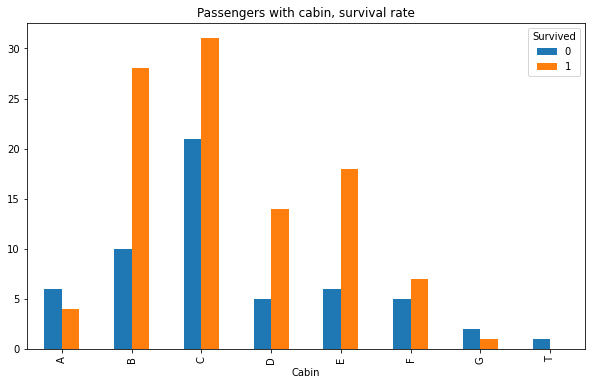

In [315]:
# Cabin/non-cabin survival rate:

speciessex=etdf.groupby(['Cabin', 'Survived'])['Survived'].count().unstack().plot.bar(figsize=(10,6), title="Passengers with cabin, survival rate")
print('Passengers without cabin, survived: ' + str(etdf[etdf['Survived'] == 1]['Cabin'].isnull().sum()))
print('Passengers without cabin, casualties: ' + str (etdf[etdf['Survived'] == 0]['Cabin'].isnull().sum()))

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

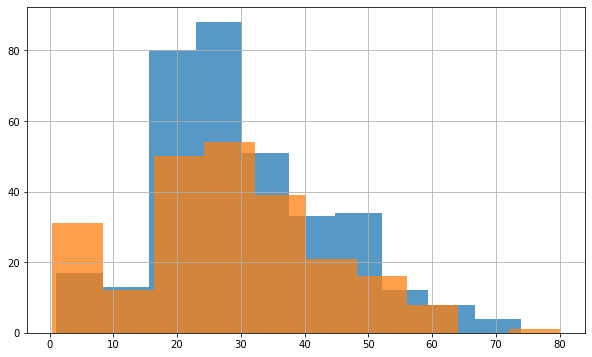

In [316]:
# Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.

etdf.groupby(['Survived'])['Age'].hist(figsize=(10,6), bins=10,  alpha=0.75, stacked = True)

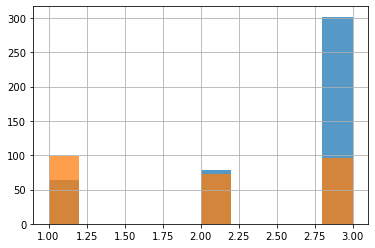

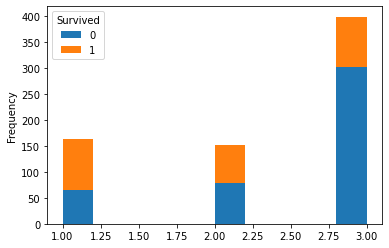

In [327]:
# Survival rate among Passenger Classes

etdf.groupby(['Survived'])['Pclass'].hist(bins=10,  alpha=0.75, stacked = True)

etdf.pivot(columns='Survived').Pclass.plot(kind = 'hist', stacked=True)


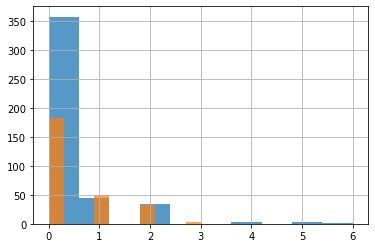

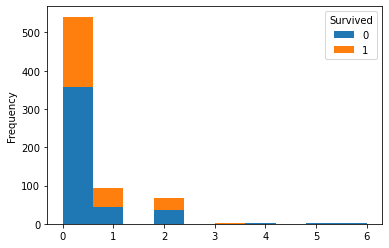

In [325]:
# Survival rate according to Number of Parents/Children Aboard

etdf.groupby(['Survived'])['Parch'].hist(bins=10,  alpha=0.75, stacked = True)

etdf.pivot(columns='Survived').Parch.plot(kind = 'hist', stacked=True)


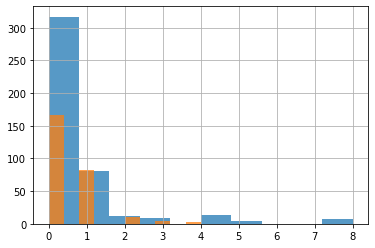

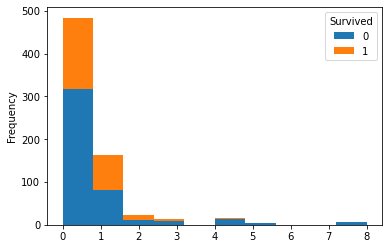

In [331]:
# Survival rate according to Number of Siblings/Spouses Aboard

etdf.groupby(['Survived'])['SibSp'].hist(bins=10,  alpha=0.75, stacked = True)

etdf.pivot(columns='Survived').SibSp.plot(kind = 'hist', stacked=True)


In [318]:
# Calculate the average age for survived and drowned passengers separately.
etdf.groupby(['Survived'])['Age'].mean()

Survived
0    30.213235
1    28.451897
Name: Age, dtype: float64

In [330]:
etdf['Age'].head(10)

331    45.5
733    23.0
382    32.0
704    26.0
813     6.0
118    24.0
536    45.0
361    29.0
29      NaN
55      NaN
Name: Age, dtype: float64

In [333]:
# Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.

pd.crosstab(index=etdf['Survived'],columns=[etdf['Pclass'],etdf['Sex']])

Pclass        1           2           3     
Sex      female male female male female male
Survived                                    
0             3   61      2   76     59  243
1            67   32     58   15     56   40

In [336]:
pd.crosstab(index=etdf['Survived'],columns=etdf['Embarked'])

Embarked,C,Q,S
Survived,,,
0,57,38,349
1,68,22,176
